In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# let's read our California Housing Dataset into DataFrame

#Housing_df = pd.read_csv("housing.csv")
Housing_df = pd.read_csv("Subset_Housing.csv")


In [2]:
Housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
Housing_df.shape

(4999, 10)

In [4]:
# let's check is there any string datatype of column or not ?

Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4999 non-null   float64
 1   latitude            4999 non-null   float64
 2   housing_median_age  4999 non-null   int64  
 3   total_rooms         4999 non-null   int64  
 4   total_bedrooms      4946 non-null   float64
 5   population          4999 non-null   int64  
 6   households          4999 non-null   int64  
 7   median_income       4999 non-null   float64
 8   median_house_value  4999 non-null   int64  
 9   ocean_proximity     4999 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 390.7+ KB


**If you can observe there is column with named "ocean_proximity" with "object" datatype .**

**we need to perform encoding to that column bacuase the Linear Regresstion with Gradient Descent only works with numeric columns.**


In [5]:
# Performing one-hot encoding
Housing_df = pd.get_dummies(Housing_df, columns=['ocean_proximity'], prefix='ocean_proximity',dtype=int)

# Viewing the resulting dataframe
Housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [6]:
# verifying the column is encoded successfully or not ?
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   4999 non-null   float64
 1   latitude                    4999 non-null   float64
 2   housing_median_age          4999 non-null   int64  
 3   total_rooms                 4999 non-null   int64  
 4   total_bedrooms              4946 non-null   float64
 5   population                  4999 non-null   int64  
 6   households                  4999 non-null   int64  
 7   median_income               4999 non-null   float64
 8   median_house_value          4999 non-null   int64  
 9   ocean_proximity_<1H OCEAN   4999 non-null   int64  
 10  ocean_proximity_INLAND      4999 non-null   int64  
 11  ocean_proximity_NEAR BAY    4999 non-null   int64  
 12  ocean_proximity_NEAR OCEAN  4999 non-null   int64  
dtypes: float64(4), int64(9)
memory us

In [7]:
# let's download that encoded file for future use.
Housing_df.to_csv("Housing1.csv", index=False)

**Now next Step is Data Pre-processing**

In [8]:
# check for null or missing values in remaining columns.

Housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,53
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0



From above code block we can easily see that the column "total_bedroom" has 53 rows with "null" or "missing value".

To handle this : We have 2 options

1 ) Remove that "missing" values rows.
Add median value on that missing values.

2 ) It's better not to remove rows ,instead add median values , because by that we'll not loose any data.

In [10]:
# Impute numeric features with median (robust to outliers)

# Below code block is for handling missing values.
# This code block identifies any columns with missing values and replace them with median value.

numeric_cols = Housing_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if Housing_df[col].isnull().any():
        Housing_df[col].fillna(Housing_df[col].median(), inplace=True);


In [11]:
# Verify
Housing_df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity_<1H OCEAN,0


**NOTE: We have cleaned the that missing value.**

**Handaling Duplicate Data. [ If Any ]**

In [12]:
Housing_df1 = Housing_df[Housing_df.duplicated()]
Housing_df1.head()

# NOTE : It seems that our dataset has no duplicate data.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN


In [13]:
Housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,-120.183947,36.395725,30.979996,2393.435287,507.511502,1334.962793,473.186037,3.476202,177086.761352,0.356471,0.364673,0.257451,0.021404
std,1.915677,2.021570,12.967547,1812.559018,373.584421,954.115996,348.616965,1.842602,107675.127932,0.479005,0.481386,0.437274,0.144742
min,-124.350000,32.670000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.090000,34.190000,20.000000,1354.000000,289.000000,762.000000,269.000000,2.184350,92750.000000,0.000000,0.000000,0.000000,0.000000
50%,-119.780000,36.770000,32.000000,1963.000000,416.000000,1109.000000,388.000000,3.062500,154400.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.410000,37.860000,41.000000,2876.000000,610.000000,1643.000000,573.000000,4.282700,226700.000000,1.000000,1.000000,1.000000,0.000000
max,-114.550000,41.950000,52.000000,28258.000000,4457.000000,12203.000000,4204.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


Feature Scaling : - **Standerisation**

**why ?**

1 ) Features like Median_House_price (500,000) and House_median_age (~1-51) have vastly different scales, which can slow or destabilize gradient descent.

2 ) Algorithm like Linear Regression with Gradient Descent , where we need to find "Global Minimum" and for that standerisation work better than Normalisation.

In [14]:
# Separate features and target
X = Housing_df.drop('median_house_value', axis=1).values
y = Housing_df['median_house_value'].values

# Scale the features
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

# Scale the target
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Convert X back to DataFrame with original column names
X = pd.DataFrame(X, columns=Housing_df.drop('median_house_value', axis=1).columns)

# Convert y back to Series
y = pd.Series(y, name='median_house_value')

# Combine features and target
Housing_cleaned_df2 = pd.concat([X, y], axis=1)

# Verify the result
Housing_cleaned_df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.068165,0.734292,0.772776,-0.835055,-1.013290,-1.061783,-0.995995,2.631866,-0.744266,-0.757623,1.698301,-0.147893,2.559001
1,-1.062944,0.724398,-0.769690,2.596349,1.602177,1.117415,1.907195,2.618949,-0.744266,-0.757623,1.698301,-0.147893,1.684989
2,-1.073385,0.719451,1.621132,-0.511171,-0.849991,-0.879397,-0.849688,2.052302,-0.744266,-0.757623,1.698301,-0.147893,1.625545
3,-1.078606,0.719451,1.621132,-0.617661,-0.729524,-0.814409,-0.729200,1.176116,-0.744266,-0.757623,1.698301,-0.147893,1.525233
4,-1.078606,0.719451,1.621132,-0.422889,-0.609057,-0.807071,-0.614449,0.200822,-0.744266,-0.757623,1.698301,-0.147893,1.533592


In [15]:
Housing_cleaned_df2.head() # verify of successful of "Standerisation"

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-1.068165,0.734292,0.772776,-0.835055,-1.013290,-1.061783,-0.995995,2.631866,-0.744266,-0.757623,1.698301,-0.147893,2.559001
1,-1.062944,0.724398,-0.769690,2.596349,1.602177,1.117415,1.907195,2.618949,-0.744266,-0.757623,1.698301,-0.147893,1.684989
2,-1.073385,0.719451,1.621132,-0.511171,-0.849991,-0.879397,-0.849688,2.052302,-0.744266,-0.757623,1.698301,-0.147893,1.625545
3,-1.078606,0.719451,1.621132,-0.617661,-0.729524,-0.814409,-0.729200,1.176116,-0.744266,-0.757623,1.698301,-0.147893,1.525233
4,-1.078606,0.719451,1.621132,-0.422889,-0.609057,-0.807071,-0.614449,0.200822,-0.744266,-0.757623,1.698301,-0.147893,1.533592


In [16]:
# Now saving the dataset for future use

Housing_cleaned_df2.to_csv("Housing_cleaned_df2.csv", index=False)

**Implementation of Linear Regression from scratch.**

In [17]:
# Loading the dataset
data = pd.read_csv('Housing_cleaned_df2.csv')

# Separate features (X) and target (y)
# Drops the 'median_house_value' column to get features as a NumPy array
X = data.drop('median_house_value', axis=1).values
# Extracts the 'median_house_value' column as a NumPy array
y = data['median_house_value'].values

# Splitting the data into training and test sets
# Splits data: 80% for training (X_train, y_train) and 20% for testing (X_test, y_test)
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom Linear Regression class
class CustomLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=10000):
        # Initialize hyperparameters
        self.learning_rate = learning_rate        # Step size for gradient descent updates
        self.iterations = iterations              # Number of gradient descent iterations
        self.weights = None                       # Model weights (slopes for each feature), to be initialized later
        self.bias = None                          # Model bias (intercept), to be initialized later

    def fit(self, X, y):
        # Train the model using gradient descent
        # Get the number of samples (rows) and features (columns) in X
        n_samples, n_features = X.shape

        # Initialize weights as a zero vector of size n_features
        self.weights = np.zeros(n_features)
        # Initialize bias as 0
        self.bias = 0

        # Perform gradient descent for the specified number of iterations
        for i in range(self.iterations):
            # Compute predictions: y_pred = X * weights + bias
            # np.dot(X, self.weights) performs matrix multiplication
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients for weights and bias
                     # dw = (1/n_samples) * X^T * (y_pred - y): Gradient of the loss w.r.t. weights
                     # X.T is the transpose of X, (y_pred - y) is the error
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))

            # db = (1/n_samples) * sum(y_pred - y): Gradient of the loss w.r.t. bias
            db = (1/n_samples) * np.sum(y_pred - y)

            # Clip gradients to prevent exploding gradients
            # Limits the gradient values (dw and db) to the range [-1.0, 1.0]
            # If a gradient component is > 1.0, it’s set to 1.0; if < -1.0, it’s set to -1.0
            # This stabilizes training by preventing large updates that could cause divergence
            dw = np.clip(dw, -1.0, 1.0)
            db = np.clip(db, -1.0, 1.0)

            # Update weights and bias using gradient descent
            # weights = weights - learning_rate * dw
            self.weights -= self.learning_rate * dw
            # bias = bias - learning_rate * db
            self.bias -= self.learning_rate * db

            # Print Mean Squared Error (MSE) every 1000 iterations to monitor training
            if i % 1000 == 0:
                # MSE = mean((y_pred - y)^2): Average squared error between predictions and actual values
                mse = np.mean((y_pred - y) ** 2)
                print(f"Iteration {i}, MSE: {mse}")

    def predict(self, X):
        # Make predictions for input features X
        # Returns y_pred = X * weights + bias
        return np.dot(X, self.weights) + self.bias



Training Both Models :
1.   Custome_model of linear Regression
2.   Sklearn_model of linear regression

In [18]:

# Train your custom model
custom_model = CustomLinearRegression(learning_rate=0.01, iterations=7000)
custom_model.fit(X_train, y_train)

# Train scikit-learn's model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)


Iteration 0, MSE: 0.9955244649516398
Iteration 1000, MSE: 0.2976450451446822
Iteration 2000, MSE: 0.2936145817951669
Iteration 3000, MSE: 0.2928651807280345
Iteration 4000, MSE: 0.2926760767862795
Iteration 5000, MSE: 0.2926167908476597
Iteration 6000, MSE: 0.29259421419245757


LinearRegression()

Printing wieghts and bais for both models.

In [19]:


print("Custom Model Weights:", custom_model.weights[:5])
print("Custom Model Bias:", custom_model.bias)

print("Scikit-learn Model Weights:", sklearn_model.coef_[:5])
print("Scikit-learn Model Bias:", sklearn_model.intercept_)


Custom Model Weights: [-0.11593523 -0.11310477  0.06615887 -0.04298515  0.27045932]
Custom Model Bias: -0.00030443400213911307
Scikit-learn Model Weights: [-0.12371377 -0.12071176  0.06566812 -0.04429979  0.25715063]
Scikit-learn Model Bias: -0.0002750350890513512


Make prediction with both models


In [20]:
# Predictions (in scaled space)
custom_predictions = custom_model.predict(X_test)
sklearn_predictions = sklearn_model.predict(X_test)

print("Custom Prediction : =" , custom_predictions[:5])
print("Sklearn Prediction : =" , sklearn_predictions[:5])


Custom Prediction : = [-0.51023242 -1.03316212 -0.31865633 -0.09664463 -0.49790612]
Sklearn Prediction : = [-0.50981861 -1.03113832 -0.31601276 -0.09559214 -0.49642851]


Convert prediction to original scale

In [21]:
# Inverse transform predictions to original scale
custom_predictions_orig = scaler_y.inverse_transform(custom_predictions.reshape(-1, 1)).flatten()
sklearn_predictions_orig = scaler_y.inverse_transform(sklearn_predictions.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()



print("Custom Predictions (Original Scale):", custom_predictions_orig[:5],'\n')
print("Sklearn Predictions (Original Scale):", sklearn_predictions_orig[:5],'\n')
print("Actual Values (Original Scale):", y_test_orig[:5],'\n')

Custom Predictions (Original Scale): [122152.91565777  65852.02565848 142778.83243282 166681.5795256
 123480.01859772] 

Sklearn Predictions (Original Scale): [122197.46828156  66069.91604311 143063.45072741 166794.8946338
 123639.1047918 ] 

Actual Values (Original Scale): [118800.  74600.  87100. 120000.  87500.] 



**Comparing predictions**

In [22]:

# Compare predictions
prediction_diff = np.abs(custom_predictions_orig - sklearn_predictions_orig)
print("Custom predictions:", custom_predictions_orig[:10])
print("\n")
print("Sklearn predictions:", sklearn_predictions_orig[:10])
print("\n")
print("Average absolute difference between predictions:", np.mean(prediction_diff))
print("\n")
print("Max absolute difference:", np.max(prediction_diff))



Custom predictions: [122152.91565777  65852.02565848 142778.83243282 166681.5795256
 123480.01859772 244932.74939125 285895.69725495 241357.21195379
 174038.92108501  71763.64094651]


Sklearn predictions: [122197.46828156  66069.91604311 143063.45072741 166794.8946338
 123639.1047918  244904.45608664 285935.10552601 241486.61322838
 173986.40278509  71490.13422591]


Average absolute difference between predictions: 229.53561359821842


Max absolute difference: 3567.75004940918


Evaluate performance

In [23]:
# Evaluate performance
custom_mse = mean_squared_error(y_test_orig, custom_predictions_orig)
sklearn_mse = mean_squared_error(y_test_orig, sklearn_predictions_orig)
print("Custom Model MSE:", custom_mse)
print("Sklearn Model MSE:", sklearn_mse)

Custom Model MSE: 4213370097.3551826
Sklearn Model MSE: 4213083985.5547647


**Calculation of R-Square and Percentage of Model accuracy.**

In [28]:
from sklearn.metrics import r2_score

# Calculate R-squared for both models
custom_r2 = r2_score(y_test_orig, custom_predictions_orig)
sklearn_r2 = r2_score(y_test_orig, sklearn_predictions_orig)

print(f"Custom Model R-squared: {custom_r2}")
print(f"Sklearn Model R-squared: {sklearn_r2}")

# Calculate percentage accuracy (using R-squared as a proxy for accuracy)
custom_accuracy = custom_r2 * 100
sklearn_accuracy = sklearn_r2 * 100


print(f"Custom Model Accuracy (%): {custom_accuracy:.5f}%")
print(f"Sklearn Model Accuracy (%): {sklearn_accuracy:.5f}%")


Custom Model R-squared: 0.6425618843853699
Sklearn Model R-squared: 0.6425861564669657
Custom Model Accuracy (%): 64.25619%
Sklearn Model Accuracy (%): 64.25862%


Data Visualisation using both models ( **Custom build model** and **sklearn model)**

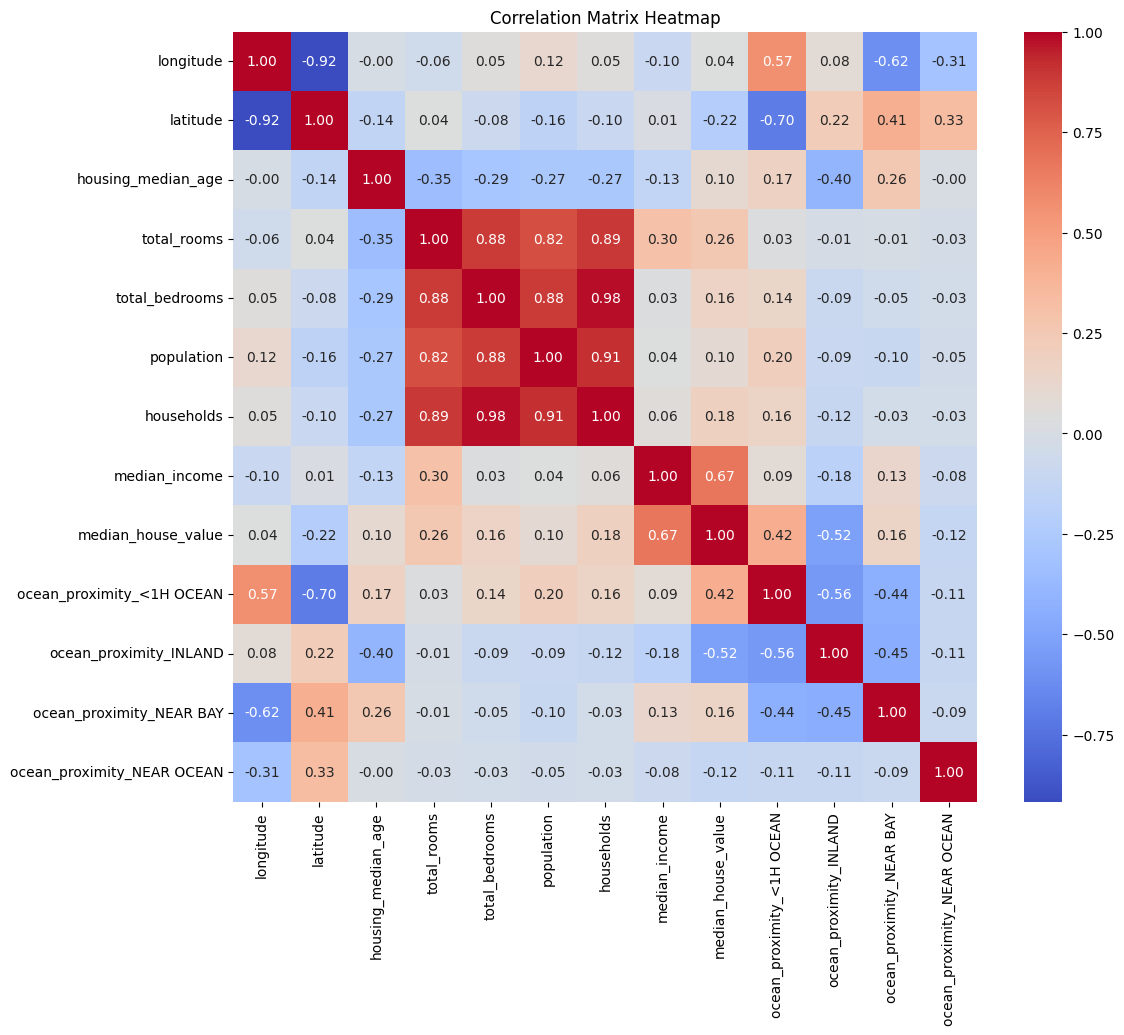

In [32]:


import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 10))
sns.heatmap(Housing_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


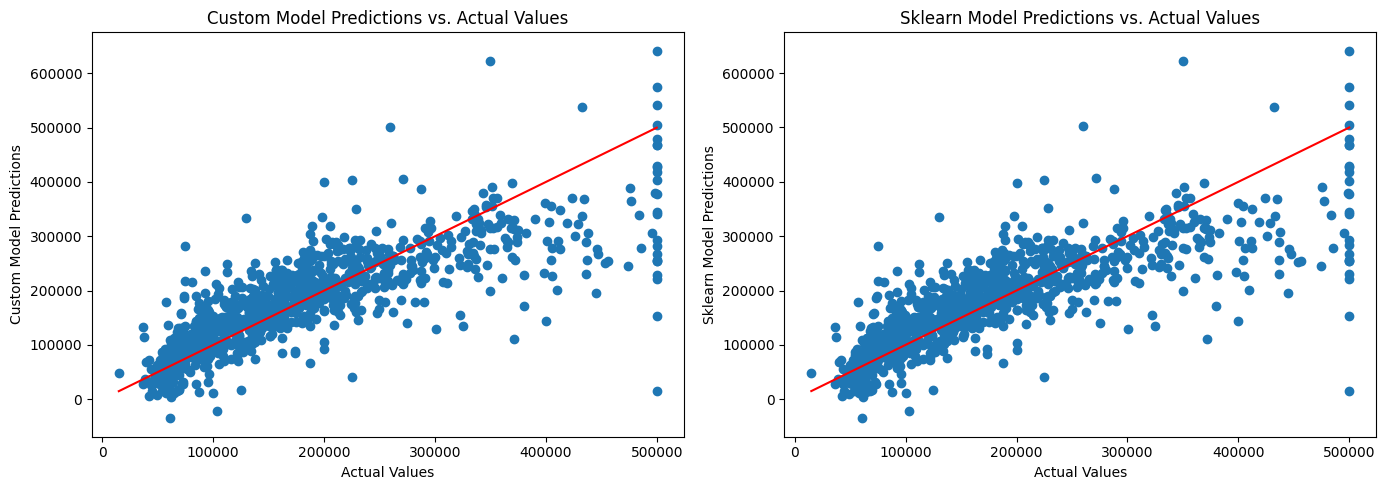

In [24]:

import matplotlib.pyplot as plt

# Assuming you have custom_predictions_orig, sklearn_predictions_orig, and y_test_orig defined

# Create the first scatter plot for the custom model
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.scatter(y_test_orig, custom_predictions_orig)
plt.plot([min(y_test_orig), max(y_test_orig)], [min(y_test_orig), max(y_test_orig)], color='red') # Added line
plt.xlabel("Actual Values")
plt.ylabel("Custom Model Predictions")
plt.title("Custom Model Predictions vs. Actual Values")

# Create the second scatter plot for the sklearn model
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.scatter(y_test_orig, sklearn_predictions_orig)
plt.plot([min(y_test_orig), max(y_test_orig)], [min(y_test_orig), max(y_test_orig)], color='red') # Added line
plt.xlabel("Actual Values")
plt.ylabel("Sklearn Model Predictions")
plt.title("Sklearn Model Predictions vs. Actual Values")

plt.tight_layout()
plt.show()


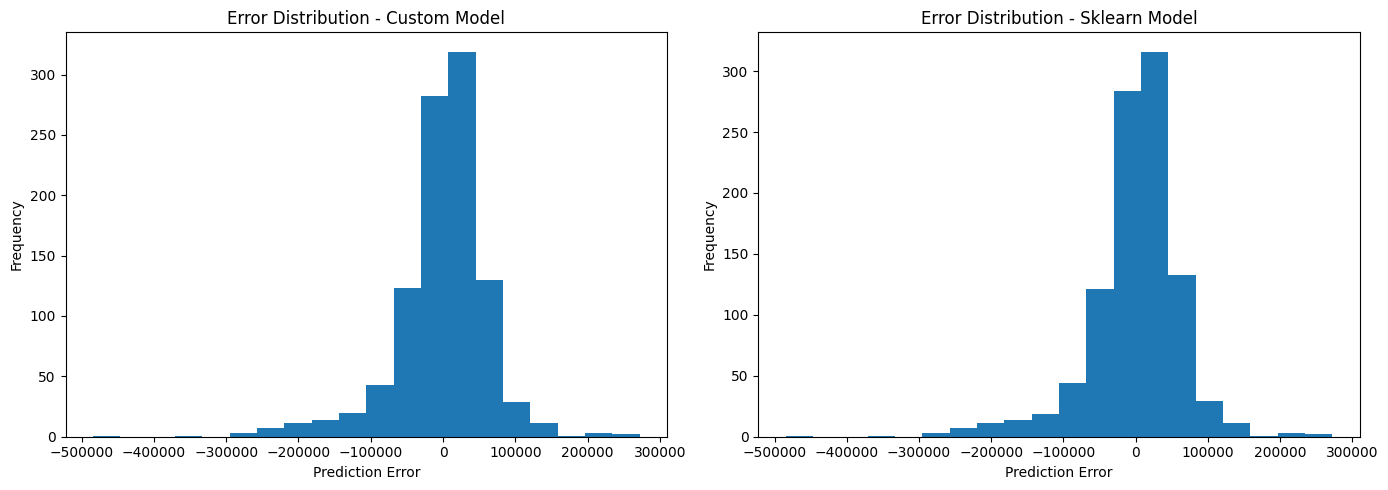

In [25]:
# Calculate errors
custom_errors = custom_predictions_orig - y_test_orig
sklearn_errors = sklearn_predictions_orig - y_test_orig

# Create the first error distribution plot for the custom model
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(custom_errors, bins=20)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution - Custom Model")


# Create the second error distribution plot for the sklearn model
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(sklearn_errors, bins=20)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution - Sklearn Model")

plt.tight_layout()
plt.show()

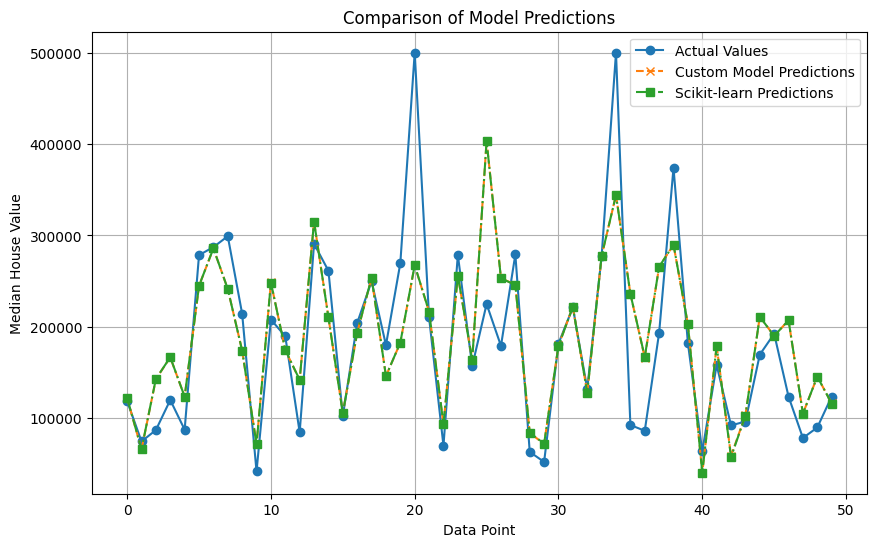

In [30]:

# Creating the plot
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test_orig[:50], label='Actual Values', marker='o', linestyle='-')

# Plot custom model predictions
plt.plot(custom_predictions_orig[:50], label='Custom Model Predictions', marker='x', linestyle='--')

# Plot scikit-learn model predictions
plt.plot(sklearn_predictions_orig[:50], label='Scikit-learn Predictions', marker='s', linestyle='-.')


# Customize the plot
plt.title('Comparison of Model Predictions')
plt.xlabel('Data Point')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


<ipython-input-26-dcf8732b9cf8>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([custom_errors, sklearn_errors], labels=['Custom Model', 'Sklearn Model'])


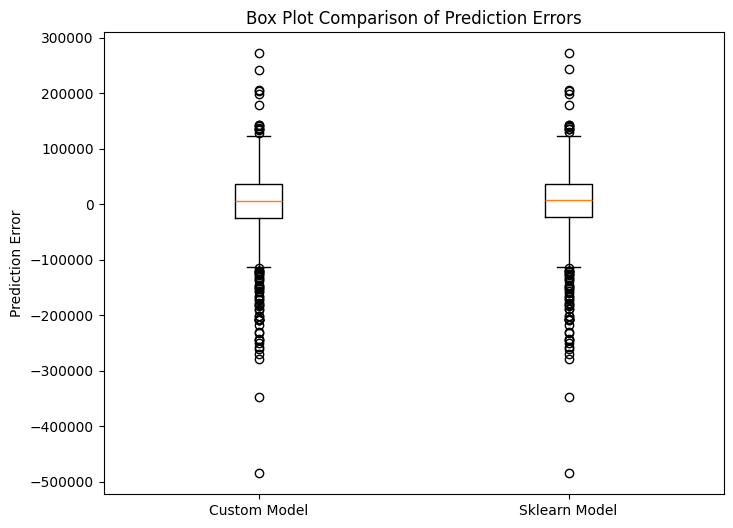

In [26]:

# Create box plots to compare error distributions
plt.figure(figsize=(8, 6))
plt.boxplot([custom_errors, sklearn_errors], labels=['Custom Model', 'Sklearn Model'])
plt.ylabel('Prediction Error')
plt.title('Box Plot Comparison of Prediction Errors')
plt.show();

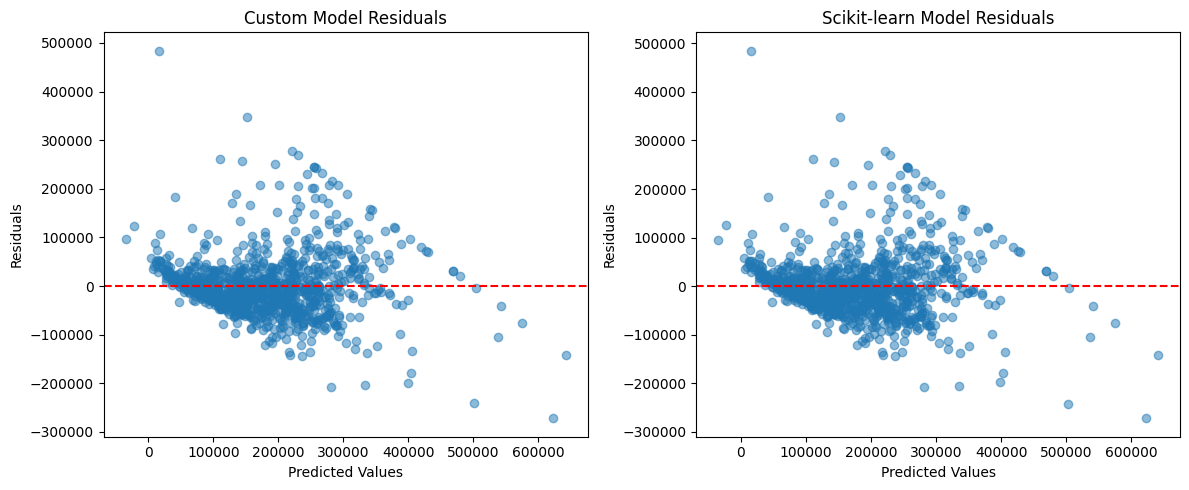

Custom Model Bias: 163.68824285373952
Scikit-learn Model Bias: 148.0277695990363


In [31]:


# Calculate the residuals for both models
custom_residuals = y_test_orig - custom_predictions_orig
sklearn_residuals = y_test_orig - sklearn_predictions_orig


# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot residuals for the custom model
axes[0].scatter(custom_predictions_orig, custom_residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
axes[0].set_title('Custom Model Residuals')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')


# Plot residuals for the scikit-learn model
axes[1].scatter(sklearn_predictions_orig, sklearn_residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
axes[1].set_title('Scikit-learn Model Residuals')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


# Calculate and print bias for both models
custom_bias = np.mean(custom_residuals)
sklearn_bias = np.mean(sklearn_residuals)

print(f"Custom Model Bias: {custom_bias}")
print(f"Scikit-learn Model Bias: {sklearn_bias}")
